# Anyone AI - Project III

# Home Credit Default Risk


You've been learning a lot about Machine Learning Algorithms, now we you're gonna be asked to put it all togheter. 

You will create a complete pipeline to preprocess the data, train your model and then predict values for the [Home Credit Default Risk](https://www.kaggle.com/competitions/home-credit-default-risk/) Kaggle competition.

## 1. Introduction

This is a binary Classification task: we want to predict whether the person applying for a home credit will be able to repay its debt or not.

The dataset is composed of multiple files with different information about loands taken. In this project we're going to exclusively work with the main files: application_train.csv and application_test.csv.

We will use [Area Under the ROC Curve](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=es_419) as the evaluation metric, so our models will have to return the probabilities that a loan is not paid for each row.

### Getting the data

To access the data for this project, you only need to execute the code below. This will download three files:

- `application_train.csv`: Training dataset you must use to train and find the best hyperparameters on your model.
- `application_test.csv`: Test dataset, use it only when you are done choosing the model and the parameters.
- `HomeCredit_columns_description.csv`: This file contains descriptions for the columns in train and test datasets.


**Don't change anything in this cell, just make it run correctly**

In [2]:
# !pip install gdown

# !gdown 1CAhmDRZLsIX1rYmUHOI8n2oatGQKGeHt
# !gdown 1jXsI16FglcBCKID1c5Us-WD758D6mWMD
# !gdown 1i96_nh9tU0YeQtbLGusjZxVp3cBctDGp

1.1. Load the training and test datasets using pandas `read_csv()` function. Assign them to `app_train` and `app_test` variables respectively.

In [3]:
# Data processing
#-----------------------
import pandas as pd
import numpy as np

#Visualization
#-----------------------
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
#-----------------------
# from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.utils.validation import check_is_fitted
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

# Miscellaneous
#-----------------------


In [4]:
### Complete in this cell: Loading the dataset
app_train = pd.read_csv('application_train.csv')
app_test = pd.read_csv('application_test.csv')

**Don't change anything in this cell, just make it run correctly**

In [5]:
if app_train.shape == (215257, 123):
  print('Success: app_train shape is correct!')
else:
  raise ValueError('Train dataset shape is incorrect, please review your code')

if isinstance(app_train, pd.DataFrame):
  print('Success: app_train type is correct!')
else:
  raise ValueError('Train dataset type is incorrect, please review your code')

if app_test.shape == (92254, 123):
  print('Success: app_test shape is correct!')
else:
  raise ValueError('Test dataset shape is incorrect, please review your code')

if isinstance(app_test, pd.DataFrame):
  print('Success: app_test type is correct!')
else:
  raise ValueError('Test dataset type is incorrect, please review your code')

app_train

Success: app_train shape is correct!
Success: app_train type is correct!
Success: app_test shape is correct!
Success: app_test type is correct!


,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,187399,317244,0,Cash loans,F,Y,Y,1,202500.0,640080.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,84777,198357,0,Cash loans,M,N,Y,0,135000.0,647046.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,5.0
2,268140,410700,0,Cash loans,F,N,Y,0,135000.0,1078200.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3,270686,413785,0,Cash loans,F,N,Y,0,202500.0,1223010.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
4,33785,139141,0,Cash loans,F,N,Y,0,54000.0,97038.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215252,202992,335324,0,Cash loans,F,N,Y,0,180000.0,263686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
215253,262129,403429,0,Cash loans,F,N,Y,0,180000.0,545040.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
215254,103024,219587,0,Cash loans,M,N,Y,1,540000.0,2517300.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
215255,147629,271174,0,Cash loans,F,Y,Y,0,382500.0,522814.5,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0


### Exploratory Data Analysis

A lot of the analysis of the data can be found on public available Kaggle kernels or blog posts, but you need to make sure you understand the datasets properties before starting working on it, so we'll do exploratory data analysis for the main files

**Dataset Basics**

1.2. Print how many samples do we have in our train and test datasets.

In [6]:
### Complete in this cell: shape of the dataset
print(f'Train size: {len(app_train)}')
print(f'Test size: {len(app_test)}')

print(f'Proportion(test): {len(app_test)/(len(app_train)+len(app_test))}')

Train size: 215257
Test size: 92254
Proportion(test): 0.30000227634133414


1.3. List all columns in the train dataset.

In [7]:
### Complete in this cell: Show all columns in the training dataset 
print('>> COLUMNS <<\n')
list(app_train.columns)

>> COLUMNS <<



['Unnamed: 0',
 'SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGI

1.4. Show the first 5 records of the training dataset, transpose the dataframe to see each record as a column and features as rows, make sure all features are visualized. Take your time to review what kind of information you can gather from this data.

> It will be better if we use "home_credit_description.csv"

In [8]:
home_credit_desc = pd.read_csv("HomeCredit_columns_description.csv",index_col= 'Unnamed: 0' )
home_credit_desc.drop(columns = ['Table', 'Special'], inplace=True )
home_credit_desc.rename({'Row':'Feature'},axis = 1,inplace= True)
home_credit_desc.set_index('Feature', inplace = True)
home_credit_desc.to_excel('home_credit_description.xlsx')

with pd.option_context('display.max_rows', None):
    display(home_credit_desc)

,Description
Feature,
SK_ID_CURR,ID of loan in our sample
TARGET,Target variable (1 - client with payment diffi...
NAME_CONTRACT_TYPE,Identification if loan is cash or revolving
CODE_GENDER,Gender of the client
FLAG_OWN_CAR,Flag if the client owns a car
FLAG_OWN_REALTY,Flag if client owns a house or flat
CNT_CHILDREN,Number of children the client has
AMT_INCOME_TOTAL,Income of the client
AMT_CREDIT,Credit amount of the loan


1.5. Show the distribution of the target variable values: print the total value count and the percentage of each value, plot this relationship.

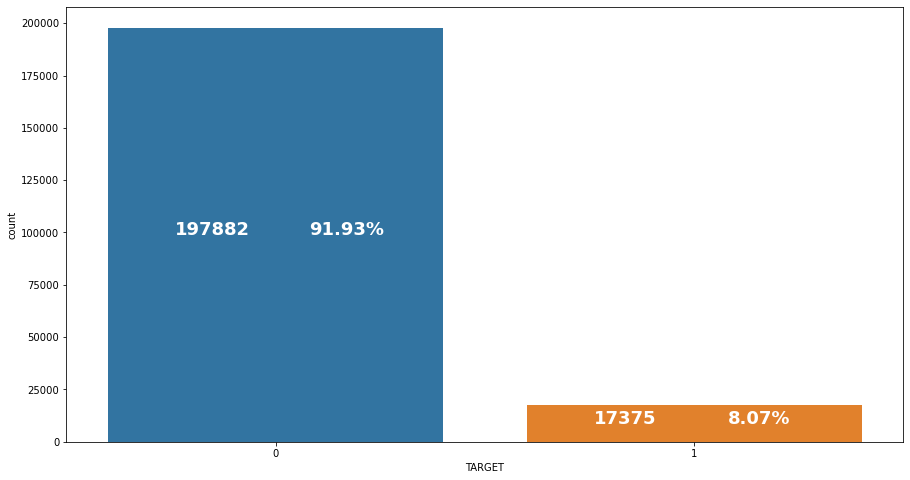

In [9]:
### Complete in this cell: show distribution of target variable

def countplot_show(data, column, hue = None,**stargs):
    fig,ax = plt.subplots(1,1, figsize = (15,8))
    ax = sns.countplot(data = data, x = column, hue = hue)

    rang = max(data[column].value_counts()) - min(data[column].value_counts())
    for p in ax.patches:
         
        # Count
        count = str(p.get_height())
        # Percentage
        perc = str((p.get_height()/len(app_train.TARGET)*100).round(2)) + '%'
        
        # Position of text
        txt_xc = p.get_x() + p.get_width()*.2
        txt_xp = p.get_x() + p.get_width()*.6
        txt_y = p.get_height()*.5

        # Text
        ax.text(txt_xp,txt_y,perc,**stargs)
        ax.text(txt_xc,txt_y,count,**stargs)
        
        
style_args = {'fontsize': 18,'color' : 'w', 'fontweight' : 'bold'}
countplot_show(app_train,'TARGET', **style_args)

1.6. Show the number of columns of each data type.

Just for giving you an idea, the output should look like this (not exactly the same numbers):

```python
float64    45
int64      32
object     10
```

In [10]:
### Complete in this cell: show number of columns per data type
app_train.dtypes.value_counts()

float64    65
int64      42
object     16
dtype: int64

1.7. For categorical variables, show the number of distinct values in each column (number of labels).

Just for giving you an idea, the output should look like this (not exactly the same numbers):

```python
NAME_CONTRACT_TYPE             5
CODE_GENDER                    2
FLAG_OWN_CAR                   1
FLAG_OWN_REALTY                1
...
```

In [11]:
### Complete in this cell: show number of unique values per categorical column
numerical_df = app_train.select_dtypes(include = ['float64','int64'])
objects_df = app_train.select_dtypes(include = ['object'])
objects_df.nunique().sort_values(ascending = False)

ORGANIZATION_TYPE             58
OCCUPATION_TYPE               18
NAME_INCOME_TYPE               8
NAME_TYPE_SUITE                7
WEEKDAY_APPR_PROCESS_START     7
WALLSMATERIAL_MODE             7
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
NAME_EDUCATION_TYPE            5
FONDKAPREMONT_MODE             4
CODE_GENDER                    3
HOUSETYPE_MODE                 3
NAME_CONTRACT_TYPE             2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
EMERGENCYSTATE_MODE            2
dtype: int64

1.8. Analyzing missing data: show the percentage of missing data for each column ordered by percentage descending (show only the 20 columns with higher missing pct)

Just for giving you an idea, the output should look like this (not exactly the same numbers and columns names):

```python
                   Total   Percent
COMMONAREA_AVG    121000      85.2
COMMONAREA_MODE   121000      76.6
COMMONAREA_MEDI   121000      62.9
...
```

In [12]:
### Complete in this cell: checking missing data
total_nans_per_col = np.sum(app_train.isna())[np.sum(app_train.isna()) > 0]
perc_nan_per_columns = np.round(np.mean(app_train.isna())[np.mean(app_train.isna()) > 0]*100,3)
nans_per_col_df = pd.DataFrame({'Total': total_nans_per_col, 'Percent': perc_nan_per_columns})
nans_per_col_df.sort_values(by = 'Percent', ascending = False, inplace= True)
nans_per_col_df.head(20)

d:\ProgramFiles\Anaconda3\envs\sprint3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,Total,Percent
COMMONAREA_MEDI,150393,69.867
COMMONAREA_AVG,150393,69.867
COMMONAREA_MODE,150393,69.867
NONLIVINGAPARTMENTS_MEDI,149483,69.444
NONLIVINGAPARTMENTS_MODE,149483,69.444
NONLIVINGAPARTMENTS_AVG,149483,69.444
FONDKAPREMONT_MODE,147217,68.391
LIVINGAPARTMENTS_MODE,147144,68.357
LIVINGAPARTMENTS_MEDI,147144,68.357
LIVINGAPARTMENTS_AVG,147144,68.357


In [13]:
## NaN counts per dtype(numerical vs object), per column
def nan_perc(df, thresh):    
    nan_counts = df.isna().sum()[df.isna().sum() > 0]
    nan_counts_perc = nan_counts/len(df)*100
    return nan_counts_perc[nan_counts_perc > thresh]

def countplot_nans(series, titles):
    fig,axes = plt.subplots(1,2,figsize = (18,12))
    plt.suptitle('Percentage(%) of Missing Values per feature', fontsize = 20)
    for k,s in enumerate(series):
        _ = sns.barplot(x = s, y = s.index, ax = axes[k])
        axes[1].set_yticklabels(s.index, horizontalalignment = 'left')
        axes[k].set_title(titles[k])


C:\Users\nicol\AppData\Local\Temp\ipykernel_1800\4129653137.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_yticklabels(s.index, horizontalalignment = 'left')


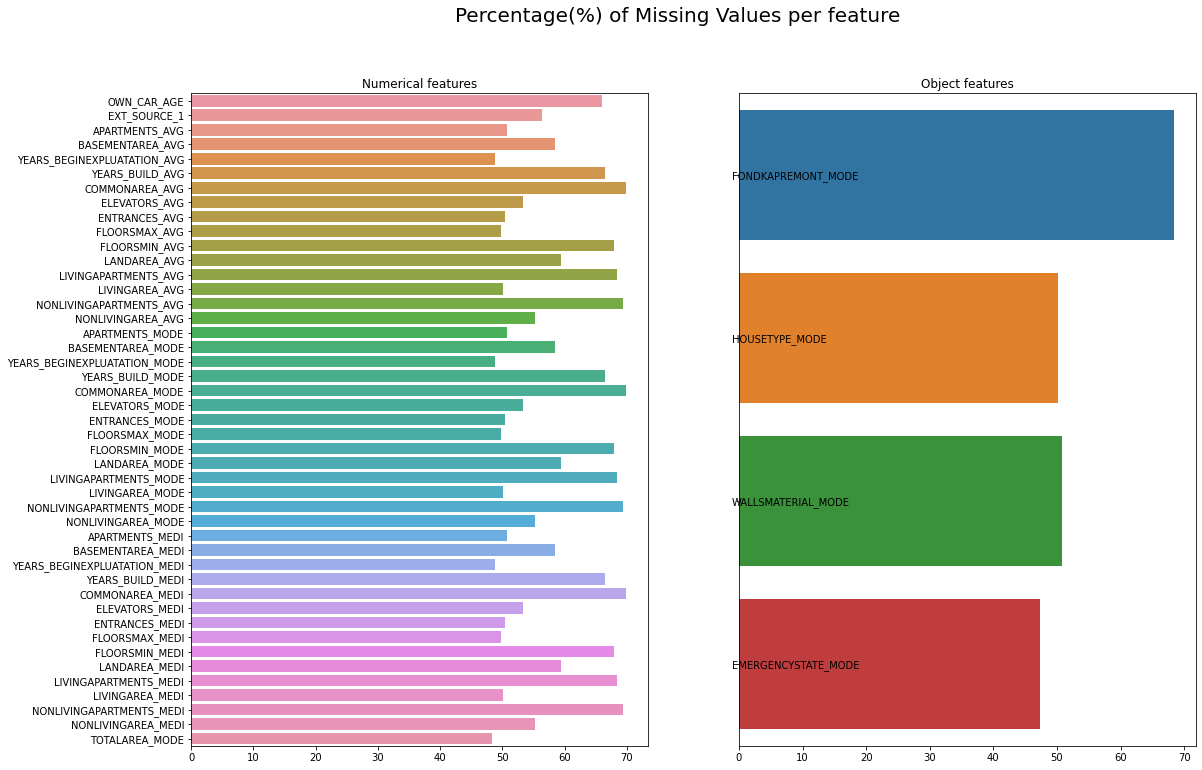

In [14]:
thresh = 40
nans_object = nan_perc(objects_df, thresh = thresh)
nans_num = nan_perc(numerical_df, thresh = thresh)
countplot_nans([nans_num,nans_object],['Numerical features','Object features'])

**Analyzing distribution of variables**

1.9. Show the distribution of credit amounts.

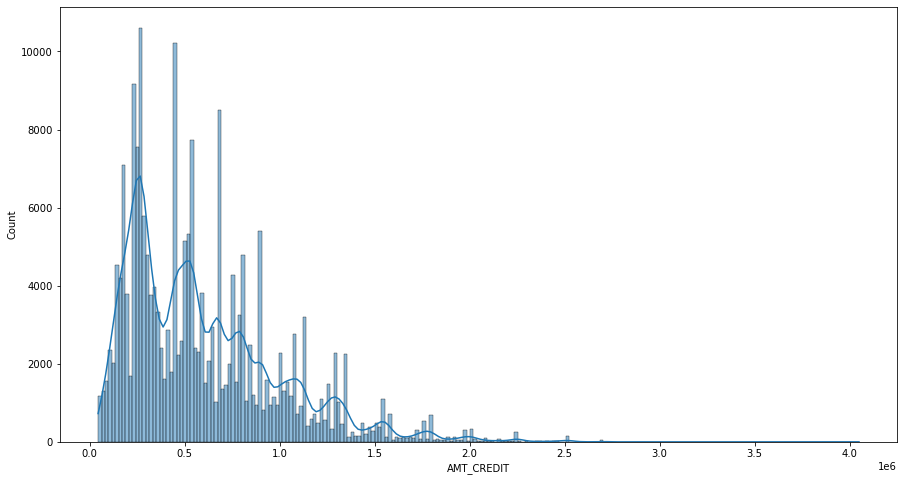

In [15]:
### Complete in this cell: distribution of credit amounts
fig2, ax2 = plt.subplots(1,1,figsize = (15,8))
ax2 = sns.histplot(data = app_train, x = 'AMT_CREDIT', kde = True)

1.10. Plot the education level of the credit applicants, show the percentages of each category. Also print the total counts for each category.

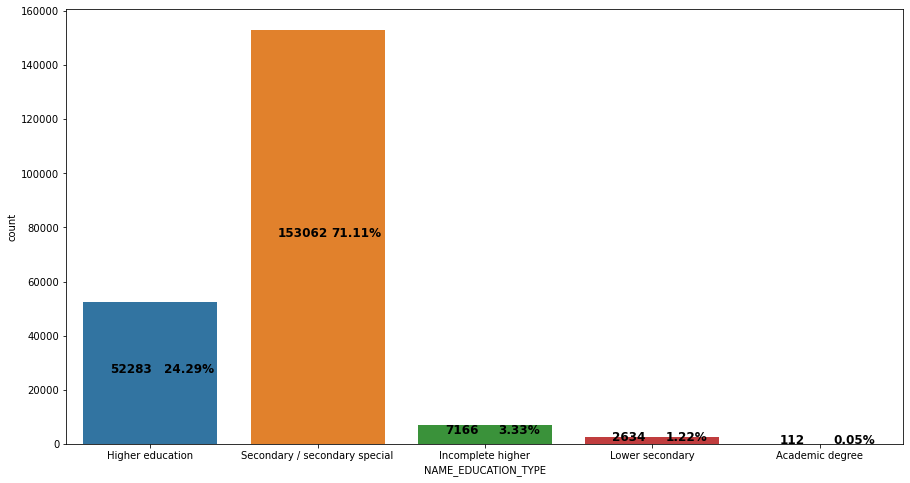

In [16]:
### Complete in this cell: level of education plot
style_args = {'fontsize':12,'color' : 'k', 'fontweight' : 'semibold' }
countplot_show(app_train,'NAME_EDUCATION_TYPE', **style_args)

1.11. Plot the distribution of ocupation of the loan applicants

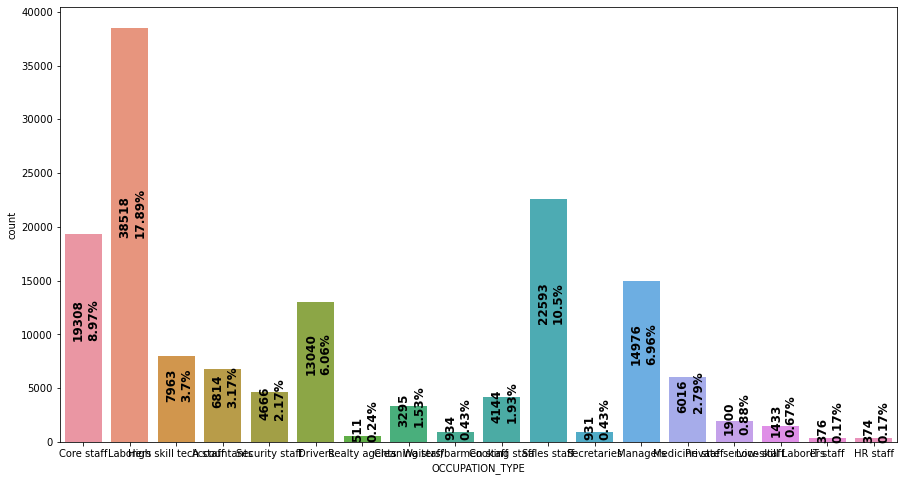

In [17]:
### Complete in this cell: ocupation of applicants
style_args = {'fontsize': 12,'color' : 'k', 'fontweight' : 'semibold', 'rotation': 90}
countplot_show(app_train, 'OCCUPATION_TYPE',**style_args)

1.12. Plot the family status of the applicants

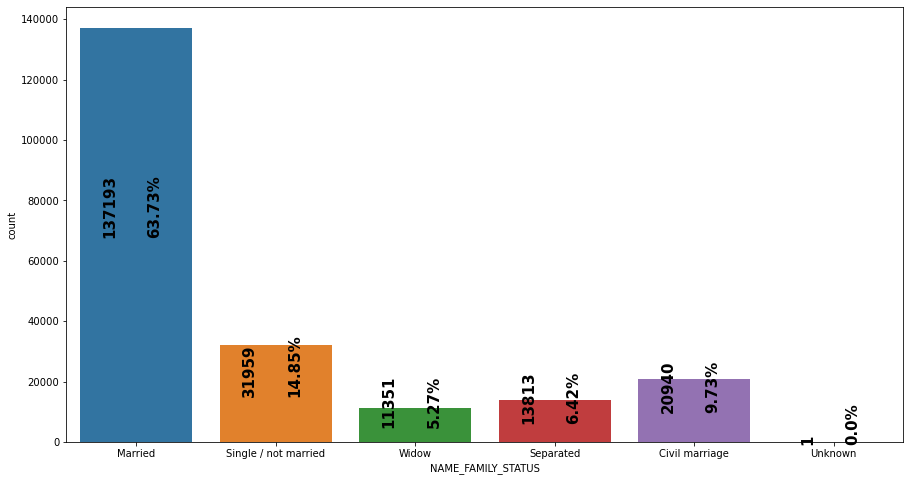

In [18]:
### Complete in this cell: family status
style_args = {'fontsize': 15,'color' : 'k', 'fontweight' : 'semibold', 'rotation': 90}
countplot_show(app_train, 'NAME_FAMILY_STATUS',**style_args)

1.13. Plot the income type of applicants grouped by the target variable

TARGET  NAME_INCOME_TYPE    
0       Working                 100537
        Commercial associate     46309
        Pensioner                36660
        State servant            14348
        Unemployed                  11
        Student                     10
        Businessman                  6
        Maternity leave              1
1       Working                  10686
        Commercial associate      3729
        Pensioner                 2077
        State servant              879
        Maternity leave              2
        Unemployed                   2
Name: NAME_INCOME_TYPE, dtype: int64


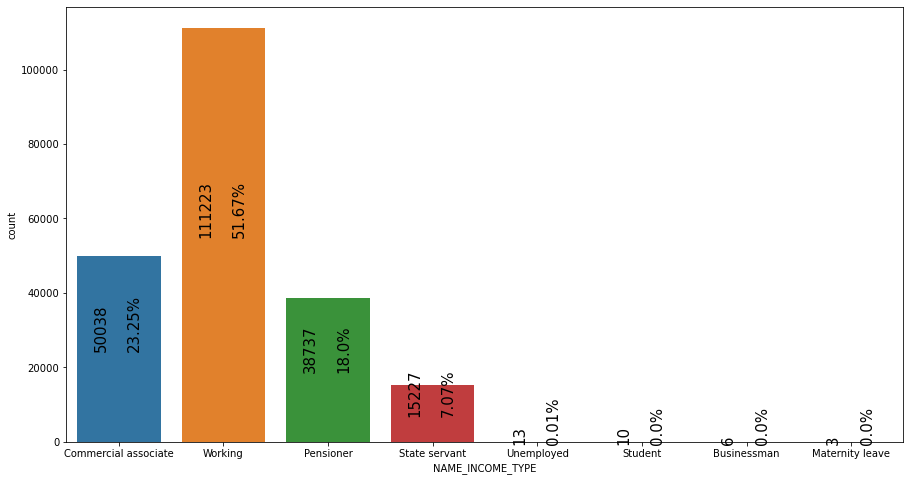

In [19]:
### Complete in this cell: income type 
print(app_train.groupby('TARGET').NAME_INCOME_TYPE.value_counts())
style_args = {'fontsize': 15,'color' : 'k', 'fontweight' : 'medium', 'rotation': 90}
countplot_show(app_train, 'NAME_INCOME_TYPE',**style_args)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


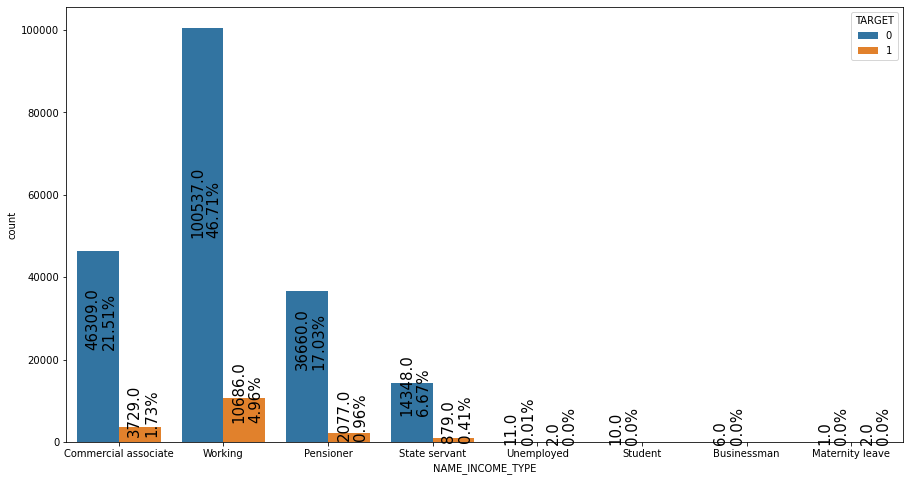

In [20]:
### Complete in this cell: Income type of applicants by target variable
style_args = {'fontsize': 15,'color' : 'k', 'fontweight' : 'medium', 'rotation': 90}
countplot_show(app_train, 'NAME_INCOME_TYPE',**style_args, hue = 'TARGET')

### [ADDITIONAL] Outlier analysis
<a id='Outliers'></a> 

In [21]:
# Outlier analysis
def get_top_outliers(numerical_df,thresh):
    
    perc_outliers = {}
    for col in numerical_df.columns: 
        serie = numerical_df[col]
        q1 = np.nanquantile(serie, .25)
        q3 = np.nanquantile(serie, .75)
        iqr = q3 - q1
        upper_bound = q3 + 1.5*iqr
        lower_bound = q1 - 1.5*iqr

        outliers = serie[(serie > upper_bound) | (serie < lower_bound)]

        perc_outliers[col] = np.round(len(outliers)/len(serie)*100,2)
        
    perc_outliers_df = pd.DataFrame({'percent_outliers': perc_outliers})                                                                  # Threshold: 5%
    top_outliers_df =  perc_outliers_df.sort_values(by = 'percent_outliers', ascending=False)

    print(f'>> Columns with the most outliers (> {thresh}%) <<')
    top_outliers_df = top_outliers_df[top_outliers_df.percent_outliers > thresh]
    top_outliers_df = top_outliers_df.merge(home_credit_desc, how = 'left', left_index= True, right_index=True)
    return top_outliers_df

thresh = 10
top_outliers_df = get_top_outliers(numerical_df,thresh)
top_outliers_df

>> Columns with the most outliers (> 10%) <<


,percent_outliers,Description
REGION_RATING_CLIENT,26.20,Our rating of the region where client lives (1...
REGION_RATING_CLIENT_W_CITY,25.38,Our rating of the region where client lives wi...
DAYS_EMPLOYED,23.46,How many days before the application the perso...
REG_CITY_NOT_WORK_CITY,23.07,Flag if client's permanent address does not ma...
FLAG_WORK_PHONE,19.94,"Did client provide home phone (1=YES, 0=NO)"
FLAG_EMP_PHONE,18.00,"Did client provide work phone (1=YES, 0=NO)"
LIVE_CITY_NOT_WORK_CITY,17.94,Flag if client's contact address does not matc...
AMT_REQ_CREDIT_BUREAU_QRT,16.37,Number of enquiries to Credit Bureau about the...
AMT_REQ_CREDIT_BUREAU_MON,14.21,Number of enquiries to Credit Bureau about the...
DEF_30_CNT_SOCIAL_CIRCLE,11.36,How many observation of client's social surrou...


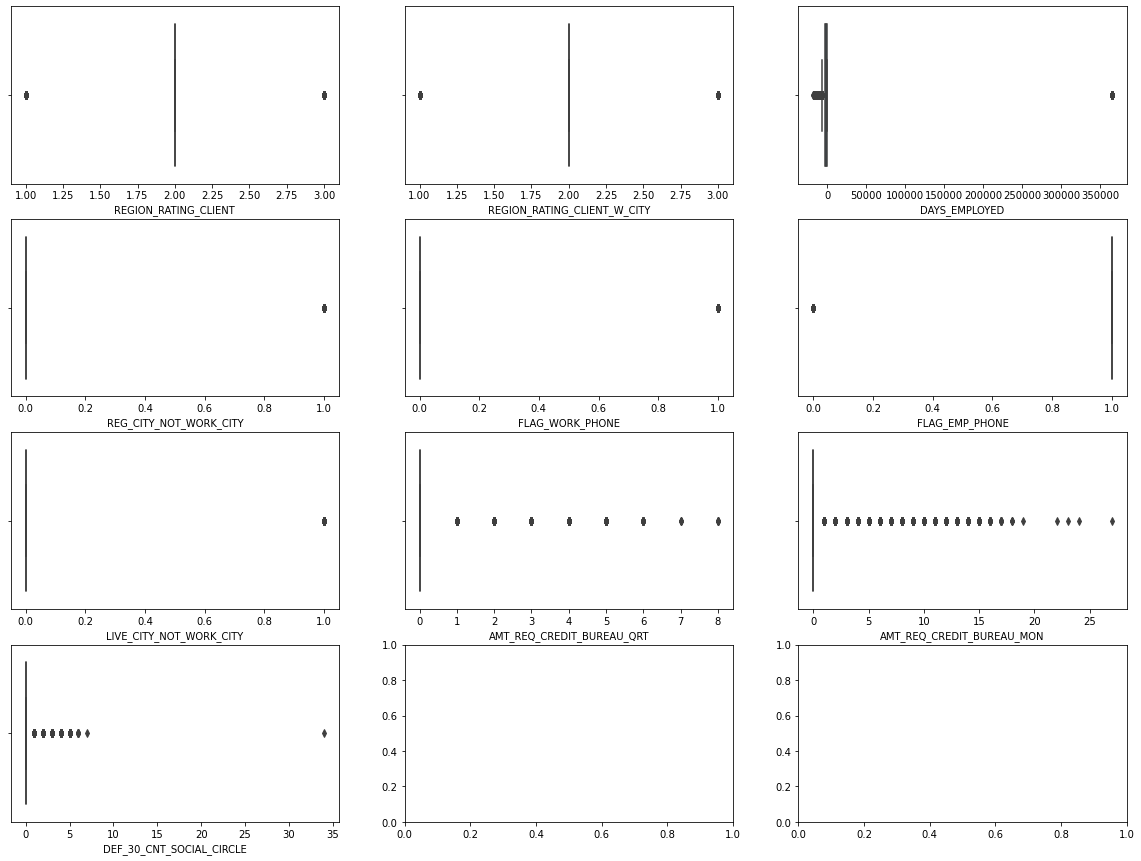

In [22]:
# Distribution of features with the most outliers
fig3, ax3 = plt.subplots(4,3,figsize = (20,15))
for ax,col in zip(ax3.ravel(),top_outliers_df.index.to_list()): 
    sns.boxplot(data = app_train, x = col, ax  = ax)

> + _This is because these should be categorical columns actually (except 'DAYS_EMPLOYED'): this means **ONLY  'DAYS_EMPLOYED' HAS OUTLIERS.**_. Let's analyze this outliers in the next lines

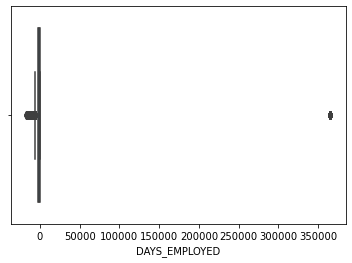

In [23]:
# Plotting DAYS_EMPLOYED isolated
_ = sns.boxplot(data = app_train, x = 'DAYS_EMPLOYED')

In [24]:
## Mean of age for outlier groups (on: 'DAYS_EMPLOYED' column)
(app_train[(app_train.DAYS_EMPLOYED > 0)]['DAYS_BIRTH']/365).median()

-60.4

> + _This means people that are outliers (value == 365243), are really old people (probably) pensioners. This argument is also supported in one of the discussion threads in the Kaggle competitions_ https://www.kaggle.com/c/home-credit-default-risk/discussion/57247'

> + _Let's convert them in np.Nan and re-analyze the distribution:_

>> Columns with the most outliers (> 0%) <<


,percent_outliers,Description
DAYS_EMPLOYED,4.92,How many days before the application the perso...


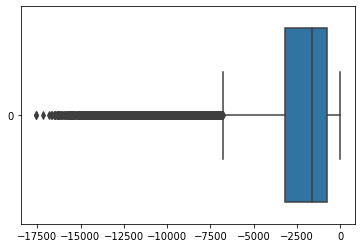

In [25]:
days_employed= app_train.DAYS_EMPLOYED.where( app_train.DAYS_EMPLOYED < 0)
sns.boxplot(data = days_employed, orient = 'h')
get_top_outliers(pd.DataFrame(days_employed),0)

> Outliers are now within an accetable interval. 'DAYS_EMPLOYED' values of 365243 will be treated as np.NaN's and imputed.

### [ADDITIONAL] Correlation analysis (vs Target)
<a id='Correlation'></a> 

<AxesSubplot:>

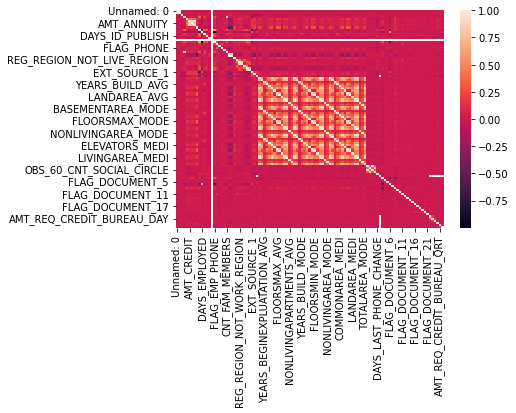

In [26]:
corr_df = app_train.corr()
sns.heatmap(corr_df)

63

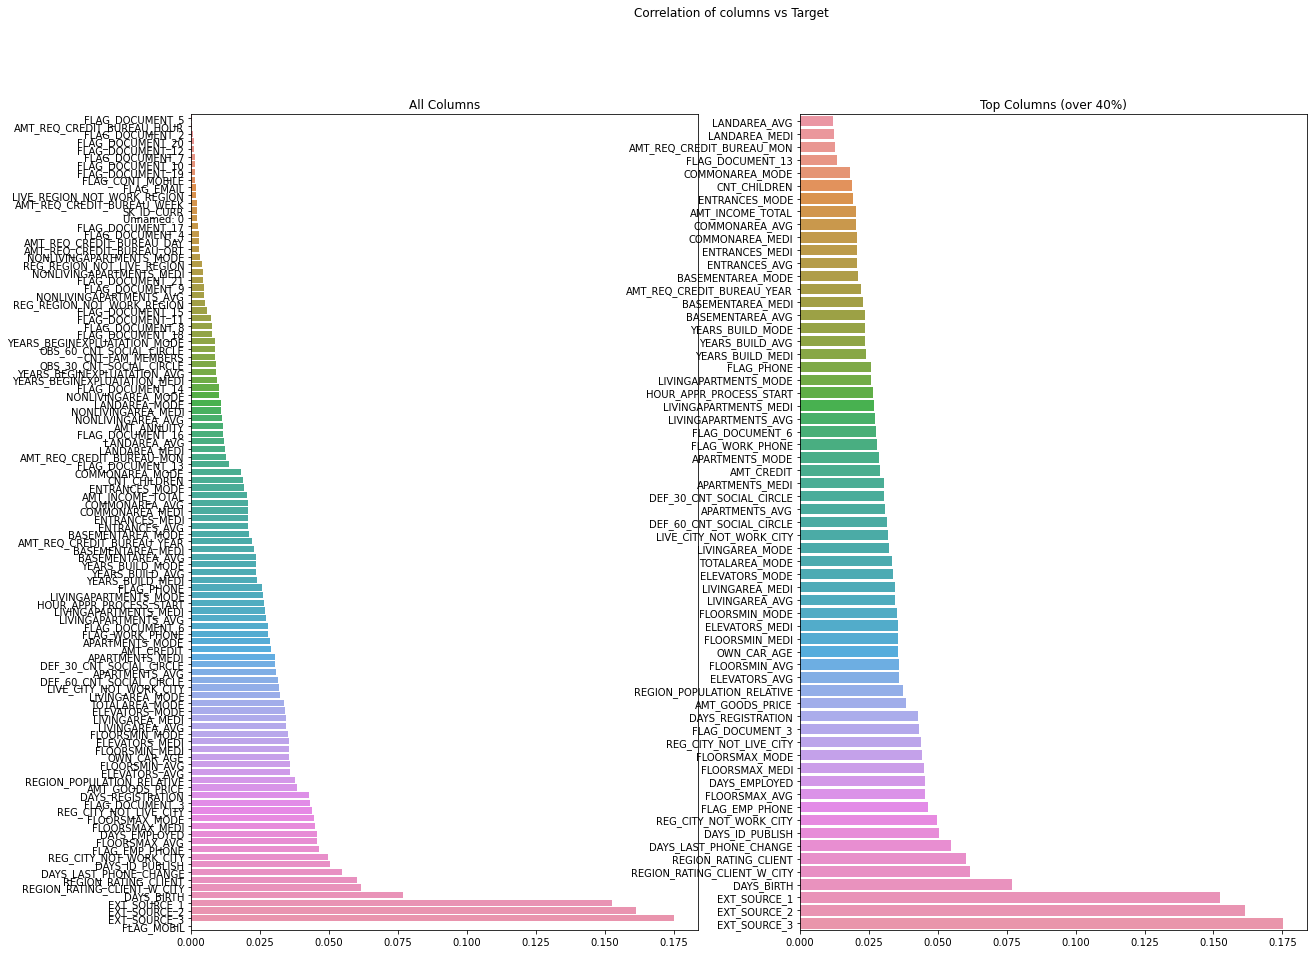

In [27]:
## Get columns that have (#nans > threshold) (defined by user)
def get_cols_nans_to_drop2(thresh):
    df = app_train.select_dtypes(exclude=['object'])
    return nan_perc(df, thresh).index

## -----  
## -----
# Converts top numerical correlated columns against target()
def get_top_corr_colums2(df_train, q_thresh = .15,plot = False):

  corr_df = df_train.drop(columns = 'TARGET').corrwith(df_train.TARGET)

  abs_corr_per_feat = corr_df.abs().sort_values()
  qlow = np.nanquantile(abs_corr_per_feat.values,q_thresh)

  top_cols_corr = abs_corr_per_feat[abs_corr_per_feat > qlow]
  
  if plot:
    figt,axt = plt.subplots(1,2,figsize = (20,15))
    _ = sns.barplot(x = abs_corr_per_feat.values,y = abs_corr_per_feat.index, ax = axt[0])
    axt[0].set_title('All Columns')
    _ = sns.barplot(x = top_cols_corr.values,y = top_cols_corr.index, ax = axt[1])
    axt[1].set_title(f'Top Columns (over {(q_thresh*100):2.0f}%)')
    figt.suptitle('Correlation of columns vs Target')
    
  return top_cols_corr

len(get_top_corr_colums2(app_train,q_thresh = .4,plot = True))


## 2. Preprocessing

2.1. The first step will be separate our train and test datasets columns between Features and Targets.

- Assign to `X_train` those columns from `app_train` that should be used as features for training our models.
- Assign to `y_train` the single column from `app_train` that should be used as our target (i.e. what we want to predict).
- Assign to `X_test` those columns from `app_test` that should be used as features for training our models.
- Assign to `y_test` the single column from `app_test` that should be used as our target (i.e. what we want to predict).


In [28]:
### Complete in this cell
X_train =  app_train.drop(columns = ['TARGET'])
y_train = app_train.TARGET
X_test = app_test.drop(columns = 'TARGET')
y_test = app_test.TARGET

**Don't change anything in this cell, just make it run correctly**

In [29]:
if X_train.shape == (215257, 122):
  print('Success: X_train shape is correct!')
else:
  raise ValueError('X_train dataset shape is incorrect, please review your code')

if isinstance(X_train, pd.DataFrame):
  print('Success: X_train type is correct!')
else:
  raise ValueError('Train dataset type is incorrect, please review your code')

if y_train.shape == (215257,) or y_train.shape == (215257, 1):
  print('Success: y_train shape is correct!')
else:
  raise ValueError('Train labels shape is incorrect, please review your code')

if X_test.shape == (92254, 122):
  print('Success: X_test shape is correct!')
else:
  raise ValueError('Test dataset shape is incorrect, please review your code')

if isinstance(X_test, pd.DataFrame):
  print('Success: X_test type is correct!')
else:
  raise ValueError('Test dataset type is incorrect, please review your code')

if y_test.shape == (92254,) or y_test.shape == (92254, 1):
  print('Success: y_test shape is correct!')
else:
  raise ValueError('Test labels shape is incorrect, please review your code')


Success: X_train shape is correct!
Success: X_train type is correct!
Success: y_train shape is correct!
Success: X_test shape is correct!
Success: X_test type is correct!
Success: y_test shape is correct!


2.2. In this section, you will code a function to make all the data pre processing for the dataset. What you have to deliver is a function that takes `X_train` and `X_test` dataframes, processes all features, and returns the transformed data as numpy arrays ready to be used for training.

The function should perform these activities:

- Correct outliers/anomalous values in numerical columns (hint: take a look at the DAYS_EMPLOYED column)
- Impute values for all columns with missing data (use median as imputing value)
- Encode categorical features:
    - If feature has 2 categories encode using binary encoding
    - More than 2 categories, use one hot encoding 
- Feature scaling

**Important note:** Keep in mind that you could get different number of columns in train and test because some category could only be present in one of the dataframes, this could create more one hot encoded columns. You should align train and test to have the same number of columns. Check `pandas.DataFrame.align()` function.

Complete the function `preprocess_data(train_df: pd.DataFrame, test_df: pd.DataFrame)` following the instructions given above.

> ---
**ANALISYS**
> * We dropped ID columns
> * We dropped columns with lots of nans (above a certain threshold), since they wouldn't give us relevant information and the imputation method used doesn't correct for that (Supporting analysis at the end of the [EDA](#EDA) section)
> * We also discarded the columns that are weakly correlated with the TARGET variable (Supporting analysis in: [[ADDITIONAL] Correlation analysis (vs Target)](#Correlation) section)
> * For the outliers, we only considered 'DAYS_EMPLOYED' column (See: [[ADDITIONAL] Outlier analysis](#Outliers))

Result: We get the same results in the _AUC_SCORE_, but the *_processing time was significantly improved, because we reduced the columns from 242 to 123_*.

In [30]:
# ------------------------------------------------------------------------------------------------
# DATA PREPROCESSING
# ------------------------------------------------------------------------------------------------
NAN_THRESH = 100
Q_CORR_THRESH = 0  

def preprocess_data(train_df: pd.DataFrame, test_df: pd.DataFrame, drop_cols: bool = False, drop_encoder: str = None, thresh: tuple = (NAN_THRESH,Q_CORR_THRESH)) -> tuple[np.ndarray, np.ndarray]:
  """
  Pre processes data for modeling. Receives train and testing dataframes 
  for Home Credit Competition, and returns numpy ndarrays of cleaned up 
  dataframes with feature engineering already performed.

  Arguments:
  train_df: pd.DataFrame
  test_df: pd.DataFrame

  Returns:
  train_data: np.ndarrary
  test_data: np.ndarrary
  """
  
  train_df.drop(columns = ['Unnamed: 0', 'SK_ID_CURR'] , inplace = True)
  test_df.drop(columns = ['Unnamed: 0', 'SK_ID_CURR'], inplace = True)
  
  # ------------------------------------------------------------------------------------------------
  ## COMPLEMENTARY FUNCTION(S)
  # ------------------------------------------------------------------------------------------------
  ## Gets columns that we will drop due to: % of Nans & Weak correlated columns
  # ------------------------------------------------------------------------------------------------
  
  ## Gets columns that have (#nans > threshold) (defined by user)
  def get_cols_nans_to_drop(df, thresh):    
    nan_counts = df.isna().sum()[df.isna().sum() > 0]
    nan_counts_perc = nan_counts/len(df)*100
    return nan_counts_perc[nan_counts_perc > thresh].index
  
  # Converts columns that contain missing values ('XNA'/'XPA') to np.NAN
  def convert_col_with_xnans(df): 
    ## Categorical
    cat_df = df.select_dtypes(include = ['object'])
    
    cols_with_nans = []
    for col in cat_df.columns:
      serie = cat_df[col] 
      if serie.str.contains('XNA').any() or serie.str.contains('XAP').any(): cols_with_nans.append(col)
      df[col]  = serie.where(np.logical_not(serie.str.contains('XNA')), np.NaN)
    
    return (df,cols_with_nans)
  
  # Gets top numerical correlated columns against target(), given a certain quantile_threshold
  def get_top_corr_colums(df_train, q_thresh,plot = False):

    corr_df = df_train.corrwith(y_train)

    abs_corr_per_feat = corr_df.abs().sort_values()
    qlow = np.nanquantile(abs_corr_per_feat.values,q_thresh)

    top_cols_corr = abs_corr_per_feat[abs_corr_per_feat > qlow]
    low_cols_corr = abs_corr_per_feat[abs_corr_per_feat <= qlow]
    
    if plot:
      figt,axt = plt.subplots(1,2,figsize = (20,15))
      _ = sns.barplot(x = abs_corr_per_feat.values,y = abs_corr_per_feat.index, ax = axt[0])
      _ = sns.barplot(x = top_cols_corr.values,y = top_cols_corr.index, ax = axt[1])
      figt.suptitle('Correlation of columns vs Target')
      
    return low_cols_corr.index
  
  # ------------------------------------------------------------------------------------------------
  # OUTLIERS
  # ------------------------------------------------------------------------------------------------
  ## We have determined during our analysis, that only 'DAYS_EMPLOYED' outliers are to be corrected
  # ------------------------------------------------------------------------------------------------
  
  train_df.DAYS_EMPLOYED = train_df.DAYS_EMPLOYED.where( train_df.DAYS_EMPLOYED < 0,np.NaN)
  test_df.DAYS_EMPLOYED = test_df.DAYS_EMPLOYED.where( test_df.DAYS_EMPLOYED < 0,np.NaN)
  
  # ------------------------------------------------------------------------------------------------
  # RELEVANT COLUMNS
  # ------------------------------------------------------------------------------------------------
  ## MISSING VALUES: 
  ##  > That there are columns with too many missing values, where we will drop columns 
  ##    with (#nans > drop_thresh)
  ## ----
  ## CORRELATION
  ##  > Columns that are weakly correlated. We will use a correlation 'q_corr_thresh' for the task of 
  ##    leaving out such columns
  # ------------------------------------------------------------------------------------------------ 
  
  if drop_cols:
    
    ## Drop columns wiht too many Missing values
    nans_cols_drop = get_cols_nans_to_drop(train_df,thresh = thresh[0])
    train_df.drop(columns= nans_cols_drop, inplace= True)
    test_df.drop(columns= nans_cols_drop, inplace= True)

    ## Drop weakly correlated columns
    corr_cols_drop = get_top_corr_colums(train_df, q_thresh= thresh[1])
    train_df.drop(columns= corr_cols_drop, inplace= True)
    test_df.drop(columns= corr_cols_drop, inplace= True)
    
  # ------------------------------------------------------------------------------------------------
  # FEATURE ENGINEERING + IMPUTATION
  # ------------------------------------------------------------------------------------------------
  ## >> Encoding for categorical columns
  ##    + One-hot -->  Non-Binary ( Categories > 2)
  ##    + Binary  -->  Binary ( Categories == 2)
  ## --
  ## >> Imputing all missing values.
  #     + Use MEDIAN for numerical
  #     + Use 'most_frequent' for categorical
  # ------------------------------------------------------------------------------------------------
  
  def encode_and_impute_df(df):
    
    # ------------------------------------------------------------------------------------------------
    # FEATURE SPLIT
    # ------------------------------------------------------------------------------------------------
    ## Numerical
    num_df = df.select_dtypes(include = ['float64','int64'])

    ## Categorical:
    ## Split into binary vs non-binary categorical DF's
    cat_df = df.select_dtypes(include = ['object'])

    cat_df_onehot = cat_df[cat_df.nunique()[cat_df.nunique() > 2].index]
    cat_df_bin = cat_df[cat_df.nunique()[cat_df.nunique() == 2].index]
    
    # ------------------------------------------------------------------------------------------------
    # PIPELINE: IMPUTER + ENCODER 
    # ------------------------------------------------------------------------------------------------
    ## Numerical features: All  ----> 'Median'
    num_enc = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy='median')),
      ('scaler', RobustScaler())])
    
    ## Categorical features: (> 3 categories) ----> 'One-Hot'
    cat_one_hot_enc = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy='most_frequent')), #IterativeImputer()),
      ('encoder', OneHotEncoder(sparse = False,drop = drop_encoder)) ]) 
   
    ## Categorical features: (= 2 categories) ----> 'Binary'
    cat_binary_enc = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy='most_frequent')),
      ('encoder', OneHotEncoder(sparse = False,drop = drop_encoder))]) 
    
    ## Final composed pre-processor
    preprocessor = ColumnTransformer( transformers= [
      ('num_enc', num_enc, num_df.columns ),
      ('cat_one_hot',cat_one_hot_enc, cat_df_onehot.columns),
      ('cat_binary_enc',cat_binary_enc, cat_df_bin.columns ) ])
    # ------------------------------------------------------------------------------------------------

    # Building df
    preprocessor.fit(df)
    encoded_df = pd.DataFrame(data = preprocessor.transform(df) ,index = df.index, columns= preprocessor.get_feature_names_out())

    return encoded_df

  # ------------------------------------------------------------------------------------------------
  # FINAL DATA PREPROCESSING
  # ------------------------------------------------------------------------------------------------
  
  ## Conversion of XNA -> np.NAN
  train_df, _ = convert_col_with_xnans(train_df)
  test_df, _ = convert_col_with_xnans(test_df)
  
  ## Final categorical encoding + imputation
  train_data_enc = encode_and_impute_df(train_df)
  test_data_enc = encode_and_impute_df(test_df)
  
  ## Train-Test column allignment
  test_data_processed, train_data_processed = test_data_enc.align(train_data_enc, axis = 1)
  
  return (train_data_processed.values.astype(np.float16),test_data_processed.values.astype(np.float16))

In the following cell we are going to execute the functions you've just coded. No need to modify this.

**Important Note:** From now on, you must always use `train_data` for training your models and `test_data` only for the final evaluation of the model trained.

**Don't change anything in this cell, just make it run correctly**

In [31]:
nan_thresh = 20
q_corr_thresh = 0.5
drop_enc = 'first'
drop_cols = True
train_data, test_data = preprocess_data(X_train.copy(), X_test.copy(), drop_cols= drop_cols,drop_encoder = drop_enc, thresh= (nan_thresh,q_corr_thresh))

**Don't change anything in this cell, just make it run correctly**

In [32]:
print(train_data.shape)
train_cols = train_data.shape[1]
if train_data.shape == (215257, train_cols):
  print('Success: train_data shape is correct!')
else:
  raise ValueError('train_data dataset shape is incorrect, please review your code')

if isinstance(train_data, np.ndarray):
  print('Success: train_data type is correct!')
else:
  raise ValueError('Train dataset type is incorrect, please review your code')

if test_data.shape == (92254, train_cols):
  print('Success: test_data shape is correct!')
else:
  raise ValueError('test_data dataset shape is incorrect, please review your code')

if isinstance(test_data, np.ndarray):
  print('Success: test_data type is correct!')
else:
  raise ValueError('Train dataset type is incorrect, please review your code')


(215257, 123)
Success: train_data shape is correct!
Success: train_data type is correct!
Success: test_data shape is correct!
Success: test_data type is correct!


## 3. Training Models

As usual, you will start training simple models and will progressively move to more complex models and pipelines.

**Pro tip:** It is of utmost importance to make an accurate estimation of the time required to train a machine learning model. Because of this, we recommend you to use Python [time](https://docs.python.org/3/library/time.html) library or Jupyter magic function `%%time` on the cell you're training your model to get an estimate of the time it took to fit your data.

### Baseline: LogisticRegression

3.1. Import LogisticRegression from sklearn and train a model using the preprocesed train data from the previous section, and just default parameters. If you receive a warning because the algorithm failed to converge, try increasing the number of iterations or decreasing the C parameter.

Assign the trained model to `log_reg` variable.

In [33]:
def fitted_regressor(data_train, model, params, search = None):
    
    X_train, y_train = data_train
    
    if search == 'grid' :       estimator = GridSearchCV(estimator = model(),param_grid = params, cv = 8, n_jobs=-1)
    elif search == 'random':    estimator = RandomizedSearchCV(estimator = model(),param_distributions= params, cv= 8, n_jobs=-1) 
    else:                       estimator = model(**params) 
    
    estimator.fit(X_train,y_train)

    return estimator

In [34]:
log_params = {'C':1,'tol': 0.0001, 'max_iter': 1000}
log_reg = fitted_regressor((train_data,y_train),model = LogisticRegression, params = log_params)

**Don't change anything in this cell, just make it run correctly**

In [35]:
if isinstance(log_reg, LogisticRegression):
  print('Success: Logistic regression model type is correct!')
else:
  raise ValueError('Logistic regression model type is incorrect, please review your code')

check_is_fitted(log_reg)

Success: Logistic regression model type is correct!


3.2. Use the trained model to predict probabilities for the test data.

**Important note:** When using the function `predict_proba()` for getting model probabilities you will get, for each sample, a tuple indicating the probability for class 0 and for class 1 respectively. For computing the AUC ROC score we only need the probability that the debt is not repaid (equivalent to class 1).

In [36]:
y_pred_log1 = log_reg.predict_proba(test_data)[:,1]

3.3. Get AUC ROC score on test dataset. See [scikit-learn AUC ROC function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) for a working implementation.

Assign the AUC ROC score to `lr_roc_auc` variable.


In [37]:
lr_roc_auc = roc_auc_score(y_test,y_pred_log1)
print(f'AUC: {lr_roc_auc}')

AUC: 0.7419138912973904


At this point, the model should produce a result around 0.67 

**Don't change anything in this cell, just make it run correctly**

In [38]:
if isinstance(lr_roc_auc, float):
  print('Success: AUC ROC score type is correct!')
else:
  raise ValueError('AUC ROC score type is incorrect, please review your code')

if lr_roc_auc >= 0.63:
  print('Success: AUC ROC score is correct!')
else:
  raise ValueError('AUC ROC score is incorrect, please review your code')

Success: AUC ROC score type is correct!
Success: AUC ROC score is correct!


### Training a Random Forest Classifier 

You're gonna start working in more complex models: ensambles, particularly, you're going to use the Random Forest Classifier from Scikit Learn. 

3.4. Train a RandomForestClassifier, print the time taken by the fit function. Just use default hyperparameters, except for n_jobs, which should be set to "-1" to allow the library to use all CPU cores to speed up training time.

Assign the trained model to `rf` variable.

In [39]:
# %%time --> We don't want THIS TO RUN TWICE
rf_params = {'n_jobs': -1}
rf = fitted_regressor((train_data,y_train),model = RandomForestClassifier, params = rf_params )

> *_Time of execution:_*

![Time of execution](timeit.jpg)

---


3.5. Use the classifier to predict probabilities on the test set.



In [40]:
### Complete in this cell: predict test data and store in
y_pred_rf1= rf.predict_proba(test_data)[:,1]

3.6. Get AUC ROC score on test dataset.

Assign the AUC ROC score to `rf_roc_auc` variable.


In [41]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf1)
print(f'AUC (Rand.Forest.): {rf_roc_auc}')

AUC (Rand.Forest.): 0.7157684422888753


At this point, the model should produce a result around 0.7

**Don't change anything in this cell, just make it run correctly**

In [42]:
if isinstance(rf_roc_auc, float):
  print('Success: AUC ROC score type is correct!')
else:
  raise ValueError('AUC ROC score type is incorrect, please review your code')

if rf_roc_auc >= 0.66:
  print('Success: AUC ROC score is correct!')
else:
  raise ValueError('AUC ROC score is incorrect, please review your code')

Success: AUC ROC score type is correct!
Success: AUC ROC score is correct!


### Randomized Search with Cross Validation

So far, we've only created models using the default hyperparameters of each algorithm. This is usually something that we would only do for baseline models, hyperparameter tuning is a very important part of the modeling process and is often the difference between having an acceptable model or not.

But, there are usually lots of hyperparameters to tune and a finite amount of time to do it, you have to consider the time and resources it takes to find an optimal combination of them. In the previous section you trained a random forest classifier and saw how much it took to train it once in your PC. If you want to do hyperparameter optimization you now have to consider that you will have to train the algorithm N number of times, with N being the cartesian product of all parameters. 

Furthermore, you can't validate the performance of your trained models on the test set, as this data should only be used to validate the final model. So we have to implement a validation strategy, K-Fold Cross Validation being the most common. But this also adds time complexity to our training, because we will have to train each combinations of hyperparameters M number of times, X being the number of folds in which we divided our dataset, so the total number of training iterations will be NxM... this resulting number can grow VERY quickly.

Fortunately there are strategies to mitigate this, here you're going to select a small number of hyperparameters to test a RandomForestClassifier, and use a Randomized Search algorithm with K-Fold Cross Validation to avoid doing a full search across the grid. 

Remember: take in consideration how much time it took to train a single classifier, and define the number of cross validations folds and iterations of the search accordingly. 
A recommendation: run the training process, go make yourself a cup of coffee, sit somewhere comfortably and forget about it for a while.


3.7. Use RandomizedSearchCV to find the best combination of hyperparameters for a RandomForestClassifier. The validation metric used to evaluate the models should be "roc_auc" (i.e. `scoring="roc_auc"`).

Assign the trained model to `rf_random` variable.

In [43]:
## This was used for HyperParameter Tuning:= Randomized Search
# rf_grid_params = {'n_estimators':[75,100,125,150], 'min_samples_split':[2,3,5,10],'max_depth':[60,75,100]}
# rf_random = fitted_regressor((train_data,y_train),model = RandomForestClassifier, params = rf_grid_params,search='random')
#-------------------------------------------------------------------------------------------------------------------------------
# This is the tuned model (with best hyperparams)  
rf_search_params_best= {'n_estimators':75, 'min_samples_split':3,'max_depth':35}
rf_random_best = fitted_regressor((train_data,y_train),model = RandomForestClassifier, params = rf_search_params_best)

3.8. Use the classifier to predict probabilities on the test set.


In [44]:
y_pred_rf_rand1 = rf_random_best.predict_proba(test_data)[:,1]

3.9. Get AUC ROC score on test dataset.

Assign the AUC ROC score to `rf_tuned_roc_auc` variable.

In [45]:
### Complete in this cell: calculate roc_auc_score.
### Assign to `rf_tuned_roc_auc` variable.
rf_tuned_roc_auc = roc_auc_score(y_test, y_pred_rf_rand1)
print(f'AUC (tuned): {rf_tuned_roc_auc}')

AUC (tuned): 0.7115994283225212


At this point, the model should produce a result around 0.7 or higher.

**Don't change anything in this cell, just make it run correctly**

In [46]:
if isinstance(rf_tuned_roc_auc, float):
  print('Success: AUC ROC score type is correct!')
else:
  raise ValueError('AUC ROC score type is incorrect, please review your code')

if rf_tuned_roc_auc >= 0.7:
  print('Success: AUC ROC score is correct!')
else:
  raise ValueError('AUC ROC score is incorrect, please review your code')

Success: AUC ROC score type is correct!
Success: AUC ROC score is correct!


3.10. Optional: If you have the time and resources, you can train the model for longer iterations, or select more estimator sizes. This is optional, but if you, we would love to see your results.

### Optional: Training a LightGBM model 

3.11. Gradient Boosting Machine is one of the most used machine learning algorithms for tabular data. Lots of competitions have been won using models from libraries like XGBoost or LightGBM. You can try using [LightGBM](https://lightgbm.readthedocs.io/en/latest/) to train a new model an see how it performs compared to the other classifiers you trained. 

In [47]:
# ## This was used for HyperParameter Tuning:= Randomized Search
# lgb_params = {
#     'objective': ['binary'],
#     'metric': ['auc'],
#     'num_iterations': [  1500, 2000,3500  ],
#     'learning_rate':[  0.05, 0.005 ],
#     'num_leaves':[ 7, 15, 31, 50, 60, 75],
#     'max_depth' :[ 10,15,25,30,35],
#     'min_data_in_leaf':[15,25 ],
#     'feature_fraction': [ 0.6, 0.8,  0.9],
#     'bagging_fraction': [  0.6, 0.8 ],
#     'bagging_freq': [   100, 200, 400  ],    }

# search_lgbm = fitted_regressor((train_data,y_train), model = lgb.LGBMClassifier, params = lgb_params, search = 'random')
## ----------------------------------------------------------------------------------------------------------------------------
## This is the tuned model (with best hyperparams)  
tuned_params = {'objective': 'binary', 'num_leaves': 31, 'num_iterations': 3500, 'min_data_in_leaf': 15, 'metric': 'auc', 'max_depth': 25, 'learning_rate': 0.005, 'feature_fraction': 0.8, 'bagging_freq': 200, 'bagging_fraction': 0.6}

tuned_lgbm = fitted_regressor((train_data,y_train), model = lgb.LGBMClassifier, params = tuned_params)

y_pred_train = tuned_lgbm.predict_proba(train_data)[:,1]
lgb_roc_auc_train = roc_auc_score(y_train, y_pred_train)
print(f'----TRAINING SCORE ------ \n AUC train(LGM): {lgb_roc_auc_train}')


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=200, subsample_freq=0 will be ignored. Current value: bagging_freq=200


d:\ProgramFiles\Anaconda3\envs\sprint3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


----TRAINING SCORE ------ 
 AUC train(LGM): 0.8214593608181142


In [48]:
print(f'Best params: {tuned_params}')
y_pred_lgb = tuned_lgbm.predict_proba(test_data)[:,1]
lgb_roc_auc = roc_auc_score(y_test, y_pred_lgb)
print(f'----TESTING SCORE ------ \n AUC test(LGM): {lgb_roc_auc}')

Best params: {'objective': 'binary', 'num_leaves': 31, 'num_iterations': 3500, 'min_data_in_leaf': 15, 'metric': 'auc', 'max_depth': 25, 'learning_rate': 0.005, 'feature_fraction': 0.8, 'bagging_freq': 200, 'bagging_fraction': 0.6}
----TESTING SCORE ------ 
 AUC test(LGM): 0.7514796076163306


### Optional: Using Scikit Learn Pipelines 

3.12. So far you've created special functions or blocks or code to chain operations on data and then train the models. But, reproducibility is important, and you don't want to have to remember the correct steps to follow each time you have new data to train your models. There are a lots of tools out there that can help you with that, here you can use a [Sklearn Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) to process your data.

> This has already been done in the [Preprocessing](#Preprocessing) section